**DRIVE MOUNT**

In [ ]:
#Mounting Google Drive in Colab notebook
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-12 16:30:24 GMT


**LIBRARY IMPORTS**

In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
from numpy.random import seed

# Ignore specific warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Importing Basic Libaries for Data Load and Image Movement
import os
import pandas as pd
import numpy as np
import itertools
import shutil

#Tensorflow libraries
import tensorflow
import keras
tensorflow.random.set_seed(101)

#libraries to build neural network models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from keras import backend as k

from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from tensorflow.keras import regularizers
from keras_tuner.tuners import RandomSearch

#Model Libraries:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet  import preprocess_input

#Split and Importing evaluation libraries
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report,balanced_accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

#Plotting Graphs:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**DIRECTORIES CREATION**

In [ ]:
# Creating new directory for file movement:
skin_dense_base_dir = 'skin_dense_base_dir'
os.mkdir(skin_dense_base_dir)

In [ ]:
# Generate a pathway leading to the 'skin_dense_base_dir' to which we will append the names of the new folders
# Training Directory creation
train_dir = os.path.join(skin_dense_base_dir, 'train_dir')
os.mkdir(train_dir)

# Validation Directory creation
val_dir = os.path.join(skin_dense_base_dir, 'val_dir')
os.mkdir(val_dir)

# Test Directory creation
test_dir = os.path.join(skin_dense_base_dir, 'test_dir')
os.mkdir(test_dir)

In [ ]:
# Creation of new folders inside Training Directory
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Validation Directory
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

In [ ]:
# Creation of new folders inside Test Directory
nv = os.path.join(test_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(test_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(test_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(test_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(test_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(test_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(test_dir, 'df')
os.mkdir(df)

**DATA LOAD AND ANALYSIS**

In [ ]:
#Read metadata information of HAM10000 dataset
df_data = pd.read_csv('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/HAM10000_metadata')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
df_data = df_data.sort_values(by='lesion_id')

In [ ]:
train_ratio = 0.7  # 70% of the data for training
test_ratio = 0.15  # 15% of the data for testing
val_ratio = 0.15   # 15% of the data for validation

In [ ]:
# Split the DataFrame into train, test, and validation sets
df_train, test_val_df = train_test_split(df_data, test_size=(test_ratio + val_ratio), random_state=42)
df_test, df_val = train_test_split(test_val_df, test_size=(val_ratio / (test_ratio + val_ratio)), random_state=42)


In [ ]:
print(len(df_train))
print(len(df_val))
print(len(df_test))

7010
1503
1502


In [ ]:
df_train['dx'].value_counts()

nv       4647
bkl       799
mel       790
bcc       362
akiec     228
vasc      100
df         84
Name: dx, dtype: int64

In [ ]:
df_val['dx'].value_counts()

nv       1015
mel       182
bkl       151
bcc        70
akiec      54
vasc       18
df         13
Name: dx, dtype: int64

In [ ]:
df_test['dx'].value_counts()

nv       1043
bkl       149
mel       141
bcc        82
akiec      45
vasc       24
df         18
Name: dx, dtype: int64

In [ ]:
# Get a list of images from HAM folder in Google Drive
folder = os.listdir('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES')

# Get a list of train ,test and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

In [ ]:
#Moving the images from google dir to train_dir
for image in train_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]


    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to val_dir
for image in val_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
#Moving the images from google dir to test_dir
for image in test_list:

    fname = image + '.jpg'
    #label = df_data.loc[image,'dx']
    label=df_data.loc[df_data['image_id'] == image, 'dx'].values[0]

    if fname in folder:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/ALL_TRAIN_IMAGES', fname)
        # destination path to image
        dst = os.path.join(test_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_dense_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/train_dir/df')))

nv: 4647
mel: 790
bkl: 799
bcc: 362
akiec: 228
vasc: 100
df: 84


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_dense_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_dense_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


In [ ]:
#Copy the train images into skin_dense_aug_dir
class_list = ['mel','bkl','bcc','akiec','vasc','df']

for item in class_list:

    # We are creating temporary directories
    # create a aug dir
    skin_dense_aug_dir = 'skin_dense_aug_dir'
    os.mkdir(skin_dense_aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(skin_dense_aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('skin_dense_base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('skin_dense_base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = skin_dense_aug_dir
    save_path = 'skin_dense_base_dir/train_dir/' + img_class

    # Create a data generator skin ui
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)

    num_aug_images_wanted = 4500 # total number of images  in each class

    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('skin_dense_aug_dir')

Found 790 images belonging to 1 classes.
Found 799 images belonging to 1 classes.
Found 362 images belonging to 1 classes.
Found 228 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 84 images belonging to 1 classes.


In [ ]:
# Determine the count of training images present in each directory.

print('nv:',len(os.listdir('skin_dense_base_dir/train_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/train_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/train_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/train_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/train_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/train_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/train_dir/df')))

nv: 4647
mel: 4500
bkl: 4545
bcc: 4132
akiec: 4154
vasc: 4500
df: 3830


In [ ]:
# Determine the count of val images present in each directory.

print('nv:',len(os.listdir('skin_dense_base_dir/val_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/val_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/val_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/val_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/val_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/val_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/val_dir/df')))

nv: 1015
mel: 182
bkl: 151
bcc: 70
akiec: 54
vasc: 18
df: 13


In [ ]:
# Check how many test images we have in each folder.

print('nv:',len(os.listdir('skin_dense_base_dir/test_dir/nv')))
print('mel:',len(os.listdir('skin_dense_base_dir/test_dir/mel')))
print('bkl:',len(os.listdir('skin_dense_base_dir/test_dir/bkl')))
print('bcc:',len(os.listdir('skin_dense_base_dir/test_dir/bcc')))
print('akiec:',len(os.listdir('skin_dense_base_dir/test_dir/akiec')))
print('vasc:',len(os.listdir('skin_dense_base_dir/test_dir/vasc')))
print('df:',len(os.listdir('skin_dense_base_dir/test_dir/df')))

nv: 1043
mel: 141
bkl: 149
bcc: 82
akiec: 45
vasc: 24
df: 18


In [ ]:
#Set Up the Generators¶

train_path = 'skin_dense_base_dir/train_dir'
valid_path = 'skin_dense_base_dir/val_dir'
test_path='skin_dense_base_dir/test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_test)
train_batch_size = 10
val_batch_size = 10
test_batch_size = 10

image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_test_samples / test_batch_size)

In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.densenet.preprocess_input)



train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size,class_mode='categorical')

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size,class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(test_path,
                                            target_size=(image_size,image_size),
                                            batch_size=test_batch_size,
                                            shuffle=False,class_mode='categorical')

Found 30308 images belonging to 7 classes.
Found 1503 images belonging to 7 classes.
Found 1502 images belonging to 7 classes.


**MODEL BUILDING**

In [ ]:
'''#libraries to build our neural netwrok model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
#from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as k

from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet  import preprocess_input
from keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img

#librariy to augment our dataset images
from keras.preprocessing.image import ImageDataGenerator

#libraries to calculate evalution scores of our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras   import regularizers'''

'#libraries to build our neural netwrok model\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D\n#from keras.layers.convolutional import Conv2D, MaxPooling2D\nfrom keras import backend as k\n\nfrom keras.utils import to_categorical\nfrom keras import optimizers\nfrom keras.optimizers import SGD,Adam\nfrom tensorflow.keras.applications import DenseNet201\nfrom tensorflow.keras.applications.densenet  import preprocess_input\nfrom keras.models import Model\nfrom tensorflow.keras.utils import img_to_array,array_to_img\n\n#librariy to augment our dataset images\nfrom keras.preprocessing.image import ImageDataGenerator\n\n#libraries to calculate evalution scores of our model\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import balanced_accuracy_score\nfrom sklearn.metrics import precision_score\nfrom sklearn.metrics import recall_score\nfrom sklearn.metrics import f1_score\nfrom tensorflow.keras   import regula

In [ ]:
'''densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
densenet_model.add(Dropout(0.2))

#densenet_model.layers[-1].trainable = True
for layer in densenet_model.layers[-10:]:
    layer.trainable = True

densenet_model.add(Dense(7, activation='softmax'))'''

"densenet_model = Sequential()\npretrained_model=DenseNet201(\n    include_top=False,\n    weights='imagenet',\n    input_shape=(224,224,3)\n)\n\nfor layer in pretrained_model.layers:\n        layer.trainable=False\n\ndensenet_model.add(pretrained_model)\ndensenet_model.add(Flatten())\ndensenet_model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))\ndensenet_model.add(Dropout(0.2))\n\n#densenet_model.layers[-1].trainable = True\nfor layer in densenet_model.layers[-10:]:\n    layer.trainable = True\n\ndensenet_model.add(Dense(7, activation='softmax'))"

In [ ]:
def build_model(hp):
    base_model = keras.applications.DenseNet201(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
    )

    for layer in base_model.layers:
        layer.trainable = False

    hp_activation = hp.Choice('activation', values=['relu','sgd'])
    model = keras.Sequential()
    model.add(base_model)
    model.add(keras.layers.Flatten())
    #model.add(keras.layers.Dense(units=hp.Int('dense_units', min_value=256, max_value=1024, step=64), activation=hp_activation, kernel_regularizer=regularizers.l1(0.01)))
    model.add(keras.layers.Dense(units=hp.Choice('dense_units', values=[512, 960]), activation=hp_activation, kernel_regularizer=regularizers.l1(0.01)))
    #model.add(Dropout(0.2))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.3, step=0.1)))
    model.add(keras.layers.Dense(7, activation='softmax'))

    for layer in model.layers[-10:]:
      layer.trainable = True

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    return model

In [ ]:
'''from keras_tuner.tuners import RandomSearch
import keras'''

'from keras_tuner.tuners import RandomSearch\nimport keras'

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='SKIN_NEW',
    project_name='densenet201_tuning_skin',
)

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
tuner.search(train_batches, epochs=10, validation_data=valid_batches)

Trial 4 Complete [01h 53m 39s]
val_accuracy: 0.8656021356582642

Best val_accuracy So Far: 0.8669328093528748
Total elapsed time: 03h 56m 06s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
final_model = build_model(best_hps)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2,verbose=1,mode='auto', restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/HAM10000_DATASET/MODEL_OUTPUTS/SKIN_CANCER_DENSENET_201_Keras_Tuner.h5', monitor='val_accuracy', save_best_only=True)
callbacks_list = [checkpoint, early_stop]

In [ ]:
history=final_model.fit(
    train_batches,
    epochs=30,
    validation_data=valid_batches,callbacks=callbacks_list
)

Epoch 1/30
3031/3031 [==============================] - 832s 241ms/step - loss: 54.4390 - accuracy: 0.7155 - val_loss: 12.3198 - val_accuracy: 0.8290
Epoch 2/30
3031/3031 [==============================] - 730s 241ms/step - loss: 11.5297 - accuracy: 0.8618 - val_loss: 11.0139 - val_accuracy: 0.8323
Epoch 3/30
3031/3031 [==============================] - 730s 241ms/step - loss: 10.9383 - accuracy: 0.9114 - val_loss: 11.0375 - val_accuracy: 0.8417
Epoch 4/30
3031/3031 [==============================] - 718s 237ms/step - loss: 10.6605 - accuracy: 0.9369 - val_loss: 11.0179 - val_accuracy: 0.8230
Epoch 4: early stopping


In [ ]:
print(final_model)

In [ ]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_1 (Flatten)         (None, 94080)             0         
                                                                 
 dense_2 (Dense)             (None, 960)               90317760  
                                                                 
 dropout_1 (Dropout)         (None, 960)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 6727      
                                                                 
Total params: 108646471 (414.45 MB)
Trainable params: 108417415 (413.58 MB)
Non-trainable params: 229056 (894.75 KB)
_________________________________________________________________


In [ ]:
# Evaluate the model and generate a confusion matrix for Test
test_batches.shuffle = False
predictions = final_model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)

151/151 [==============================] - 16s 87ms/step


In [ ]:
#Generate Confusion Matrix and Classification Report for Test Inages
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

confusion_matrix_result = confusion_matrix(true_classes, predicted_classes)
classification_report_result = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels
)

print("Confusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", classification_report_result)

Confusion Matrix:
 [[  34    5    4    0    0    2    0]
 [   8   56    2    0    1   15    0]
 [   9    2   66    0   16   56    0]
 [   0    1    0   11    0    6    0]
 [   4    3    5    1   56   71    1]
 [   1    8    4    0   14 1016    0]
 [   0    0    0    0    0    2   22]]

Classification Report:
               precision    recall  f1-score   support

       akiec       0.61      0.76      0.67        45
         bcc       0.75      0.68      0.71        82
         bkl       0.81      0.44      0.57       149
          df       0.92      0.61      0.73        18
         mel       0.64      0.40      0.49       141
          nv       0.87      0.97      0.92      1043
        vasc       0.96      0.92      0.94        24

    accuracy                           0.84      1502
   macro avg       0.79      0.68      0.72      1502
weighted avg       0.83      0.84      0.82      1502



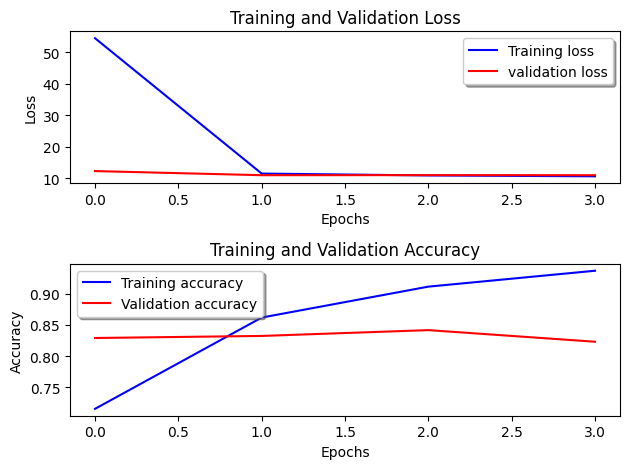

In [ ]:
#Creating Train and Valication dataset Loss and Accuracy graphs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Training and Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
import datetime
import pytz

london_timezone = pytz.timezone('Europe/London')
current_time_london = datetime.datetime.now(london_timezone)
print("Current Date and Time in London:", current_time_london.strftime("%Y-%m-%d %H:%M:%S %Z"))

Current Date and Time in London: 2023-12-12 21:28:59 GMT
